# finding high risk roads in Vietnam

#### importing required packages

In [2]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
import pandas as pd
import numpy as np

In [2]:
# this the address on my own system
sl = "C:/Users/zahraeftekhar/PycharmProjects/TRAIL-Data-Science-Bootcamp-course/Datasets/"


In [ ]:
hospitals = gpd.read_file("Datasets/Hospitals_VNM.geojson")
Road = gpd.read_file("{a}Road_Network_VNM.geojson".format(a=sl))
Boundaries =gpd.read_file("{a}Vietnam_Administrative_Boundaries.geojson".format(a=sl))
# Boundaries.to_file("Datasets/Boundaries.shp")

In [4]:
Boundaries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### pre-processing the flood file

The flood file was in the format of `.tif` therefore we used arcGIS to first convert the file (raster) to polygons and then keep only the data inside the border of Vietnam. This was done using intersection analysis with the road network file. The output (`.SHP` file) is the input for the next step:

#### subsetting the roads with higher risk of flood

Now, we read the output of arcGIS as a geopandas dataframe. We only keep the links with the flood risk of 3,4, and 5 which are considered to be the highest flood risk. 

In [19]:
risk = gpd.read_file('Datasets/Flood Risk/riskRoad/riskRoad_1.shp')


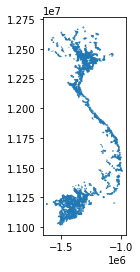

In [21]:
risk
highRisk = risk[risk.gridcode>2]
highRisk.plot()
highRisk.to_file("flood_highrisk/flood_highrisk.shp")